<a href="https://colab.research.google.com/github/MacWorldPro/Module_34/blob/main/PCA_Practical_Implementation_on_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [42]:
num={
    'setosa':0,
    'versicolor':1,
    'virginica':2
}

In [43]:
# let us map them and convert a new column named species_num
df['species_num']=df['species'].map(num)

In [44]:
df.drop(columns='species',inplace=True)

In [45]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
# let us apply pca (principal component analysis) step by step
df.drop(columns='sepal_length',inplace=True)

In [47]:
df.head(2)

,sepal_width,petal_length,petal_width,species_num
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0


In [13]:
import plotly.express as px

fig = px.scatter_3d(df, x=df['sepal_width'], y=df['petal_length'], z=df['petal_width'],
              color=df['species_num'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
df.iloc[:,0:3]

In [48]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [49]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[ 1.00671141 -0.43131554 -0.36858315]
 [-0.43131554  1.00671141  0.96932762]
 [-0.36858315  0.96932762  1.00671141]]


In [50]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [51]:
eigen_values

array([2.23639262, 0.74879622, 0.03494539])

In [52]:
eigen_vectors

array([[ 0.41811772, -0.90673353, -0.05488053],
       [-0.648267  , -0.25551984, -0.71725833],
       [-0.63633911, -0.33547565,  0.6946428 ]])

In [20]:
df.head(2)

,sepal_width,petal_length,petal_width,species_num
0,1.019004,-1.340227,-1.315444,0
1,-0.131979,-1.340227,-1.315444,0


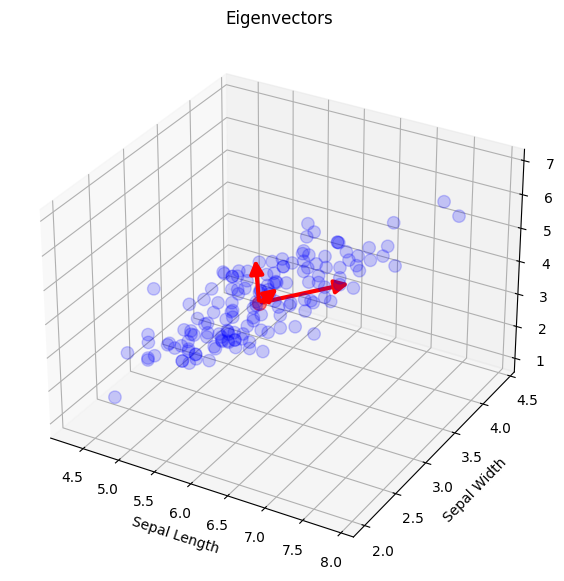

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Perform PCA to get eigenvectors
pca = PCA(n_components=3)
pca.fit(df)
eigen_vectors = pca.components_

# Define the Arrow3D class
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Plotting
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], marker='o', s=80, color='blue', alpha=0.2)
ax.scatter([df.iloc[:, 0].mean()], [df.iloc[:, 1].mean()], [df.iloc[:, 2].mean()], marker='o', s=100, color='red', alpha=0.5)

# Plot eigenvectors as arrows
for v in eigen_vectors:
    a = Arrow3D([df.iloc[:, 0].mean(), df.iloc[:, 0].mean() + v[0]],
                [df.iloc[:, 1].mean(), df.iloc[:, 1].mean() + v[1]],
                [df.iloc[:, 2].mean(), df.iloc[:, 2].mean() + v[2]],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('Eigenvectors')

plt.show()


In [53]:
pc = eigen_vectors[0:1]

In [54]:
pc

array([[ 0.41811772, -0.90673353, -0.05488053]])

In [55]:
# featuring extracting and reducing the dimension into 1 feature only
# Transform the data to 1 component
transformed_df = np.dot(df.iloc[:, 0:3], pc.T)

# Create a new DataFrame with the transformed data
new_df = pd.DataFrame(transformed_df, columns=['PC1'])
new_df['target'] = df['species_num'].values

# Display the first few rows of the new DataFrame
new_df.head()

,PC1,target
0,1.713484,0
1,1.232238,0
2,1.476273,0
3,1.276951,0
4,1.809734,0


In [56]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

# So here we have Applied PCA (Principal Component Analysis) and converted the three dimensional data into 3 dimensions.